# **Objective**: To build a predictive model which predicts the market value of a football player

## **Overview:**
1. Introduction to problem statement

2. Hypothesis generation with respect to problem statement

3. Introduction to dataset

4. Importing dataset and required libraries.

5. Variable Identification and Typecasting

6. Univariate Analysis:

    6.1 Numerical Variables

    6.2 Categorical Variables

    6.3 Missing Values

  
    
7. Bivariate Analysis and Hypothesis Testing

    7.1 Bivariate Analysis: Numerical-Numerical

    7.2 Bivariate Analysis: Numerical-Categorical

8. Feature Engineering
9. Model Building and Evaluation
10. Cross Validation
11. Hyperprameter Tuning
    

## **1. Introduction to problem statement**
In the English Premier League, May - July represents a lull period due to the lack of club football. What makes up for it, is the intense transfer speculation that surrounds all major player transfers today. An important part of negotiations is predicting the fair market price for a player. You are tasked with predicting this Market Value of a player using the data provided below

**Your task is:**

* Use Seaborn to investigate the data and present your findings (20 marks)
* Build models using all the algorithms above to predict market_value (15 marks)
* Tune the hyperparameters and build the most accurate model (20 marks)
* Use model selection approaches discussed in class to choose the best model (10 marks)
* Implement a Genetic Algorithm for learning attribute weights for the Nearest Neighbour Algorithm. Implement at least one mechanism for maintaining Diversity within the Population (25 marks)
* Deploy your model as a RESTful Web Service (10 marks)

## **2. Hypothesis generation with respect to problem statement**
* Does club plays any significant role in the market_value of a customer.
* Does age of a player has impacted the market_value of a customer.
* Are position_cat effects the market_value of a customer.
* Are more pagev_views of a player are more likely to have a more market)value of a customer.
* Is greater fpl_value of a player has high market value
* Is higher fpl_points have high market_value
* Is higher fpl_sel have high market_value.
* Does the region of player in which they live has iny impact on the market value of a player
* Are the players belonging to new foiregn have high market_value.
* what is the impact of age_cat on the marjket_value.
* Are the players belong to big_club has high market_value.
* Does new signing players has low market_value.


## **3. Introduction to Dataset.**
The attached data set consists of the following attributes:

**name**: Name of the player
**club**: Club of the player
**age** : Age of the player
**position** : The usual position on the pitch
**position_cat** : 
1 for attackers

2 for midfielders

3 for defenders

4 for goalkeepers

**market_value** : As on transfermrkt.com on July 20th, 2017<br>
**page_views** : Average daily Wikipedia page views from September 1, 2016 to May 1, 2017<br>
**fpl_value** : Value in Fantasy Premier League as on July 20th, 2017<br>
**fpl_sel** : % of FPL players who have selected that player in their team<br>
**fpl_points** : FPL points accumulated over the previous season<br>
**region**: <br>
1 for England

2 for EU

3 for Americas

4 for Rest of World

**nationality**<br>
**new_foreign** : Whether a new signing from a different league, for 2017/18 (till 20th July)<br>
**age_cat**<br>
****<br>
big_club_idclub: Whether one of the Top 6 clubs<br>
**new_signing**: Whether a new signing for 2017/18 (till 20th July)

## **4. Importing dataset and required libraries.**

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
#importing dataset
data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Sabudh Foundation/Football_PP/train_data.csv')
data.head()

,name,club,age,position,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,region,nationality,new_foreign,age_cat,club_id,big_club,new_signing
0,Alexis Sanchez,Arsenal,28,LW,1,65.0,4329,12.0,17.10%,264,3.0,Chile,0,4,1,1,0
1,Mesut Ozil,Arsenal,28,AM,1,50.0,4395,9.5,5.60%,167,2.0,Germany,0,4,1,1,0
2,Petr Cech,Arsenal,35,GK,4,7.0,1529,5.5,5.90%,134,2.0,Czech Republic,0,6,1,1,0
3,Theo Walcott,Arsenal,28,RW,1,20.0,2393,7.5,1.50%,122,1.0,England,0,4,1,1,0
4,Laurent Koscielny,Arsenal,31,CB,3,22.0,912,6.0,0.70%,121,2.0,France,0,4,1,1,0


data.shape

In [ ]:
data.shape

(461, 17)

### **Observations:**
* This shows that the train and test data is imported successfully.
* The train data consists of 461 training examples with 17 features.

## **5. Variable Identification and type casting.**
In this section, our task is to identify all the variables present in the dataset that are provided in the data dictionary and also identify the data types of the variables and if needed convert them in specific type by thinking manually.<br>

So let's dive into this.....

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    int64  
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    object 
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    float64
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    int64  
 13  age_cat       461 non-null    int64  
 14  club_id       461 non-null    int64  
 15  big_club      461 non-null    int64  
 16  new_signing   461 non-null    int64  
dtypes: float64(3), int64(9), object(5)
memory usage: 61.4+ KB


### Numerical Features:
* age
* market_value(target variable)
* page_views
* fpl_sel
* fpl_values
* fpl_points

### Categorical Features:
* name
* club
* position
* position_cat
* region
* nationality
* new_foriegn
* age_category
* club_id
* big_club
* new_singing

 

In [ ]:
rem_percent = lambda x: (x.replace('%' , ''))
data['fpl_sel'] = data['fpl_sel'].apply(rem_percent)


In [ ]:
# Type casting
data['position_cat'] = data['position_cat'].astype('object')
data['fpl_sel'] = data['fpl_sel'].astype('float32')
data['region'] = data['region'].astype('object')
data['new_foreign'] = data['new_foreign'].astype('object')
data['age_cat'] = data['age_cat'].astype('object')
data['club_id'] = data['club_id'].astype('object')
data['big_club'] = data['big_club'].astype('object')
data['new_signing'] = data['new_signing'].astype('object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    object 
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    float32
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    object 
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    object 
 13  age_cat       461 non-null    object 
 14  club_id       461 non-null    object 
 15  big_club      461 non-null    object 
 16  new_signing   461 non-null    object 
dtypes: float32(1), float64(2), int64(3), object(11)
memory usage: 59.6+ KB


## **Exploratory Data Analysis**

## **6 Univariate Analysis**

## **6. 1 Univariate Analysis: Numeric**

* In this section we are going to explore and analyze the numerical features. So let's get start with the statistical information of the data.

In [ ]:
print('Number of trainings examples:', len(data),'\n')
data.describe()

Number of trainings examples: 461 



,age,market_value,page_views,fpl_value,fpl_sel,fpl_points
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,26.804772,11.012039,763.776573,5.447939,3.244249,57.314534
std,3.961892,12.257403,931.805757,1.346695,5.675663,53.113811
min,17.000000,0.050000,3.000000,4.000000,0.000000,0.000000
25%,24.000000,3.000000,220.000000,4.500000,0.200000,5.000000
50%,27.000000,7.000000,460.000000,5.000000,1.000000,51.000000
75%,30.000000,15.000000,896.000000,5.500000,3.300000,94.000000
max,38.000000,75.000000,7664.000000,12.500000,45.000000,264.000000


* **Before moving further let's make a list of numeric features.**

In [ ]:
numerical = data.select_dtypes(include = ['int64', 'Int64','float64']).dtypes.index
numerical

Index(['age', 'market_value', 'page_views', 'fpl_value', 'fpl_points'], dtype='object')

In [ ]:
def UVA_numeric(data, var_group, layout = None):
  '''
  data {dataframe}: the bulk data
  var_group {list}: list of variable to analyse
  layout{tuple}   : layout of visualisation (rows x columns)
  '''

  if layout == None:
    layout = (1,len(var_group))

  plt.figure(figsize = (layout[1]*10, layout[0]*10), dpi = 100)


  for j,i in enumerate(var_group):
    min = data[i].min()
    max = data[i].max()
    range = data[i].max() - data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    std_dev = data[i].std()
    skew = data[i].skew()
    kurtosis = data[i].kurtosis()

    points = mean-std_dev, mean+std_dev

    #plotting of numeric features with all information.
    plt.subplot(layout[0],layout[1],j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'red', label = 'std_dev')
    sns.scatterplot([min,max], [0,0], color ='red', label = 'min/max')
    sns.scatterplot([mean], [0], color = 'blue', label = 'mean')
    sns.scatterplot([median], [0], color = 'green', label = 'median')
    plt.xlabel('{}'.format(i), fontsize = 20, fontweight = 'bold')
    plt.ylabel('Density', fontsize = 16, fontweight = 'bold')
    plt.title('std_dev = {}; kurtosis = {};\n skew = {}; range = {};\n mean = {}; median = {}'.format
                                                                                              ((round(points[0],2), round(points[1],2)),
                                                                                               round(kurtosis,2), round(skew,2),
                                                                                               (round(min,2), round(max,2), round(range,2)),
                                                                                               round(mean,2),
                                                                                               round(median,2)))

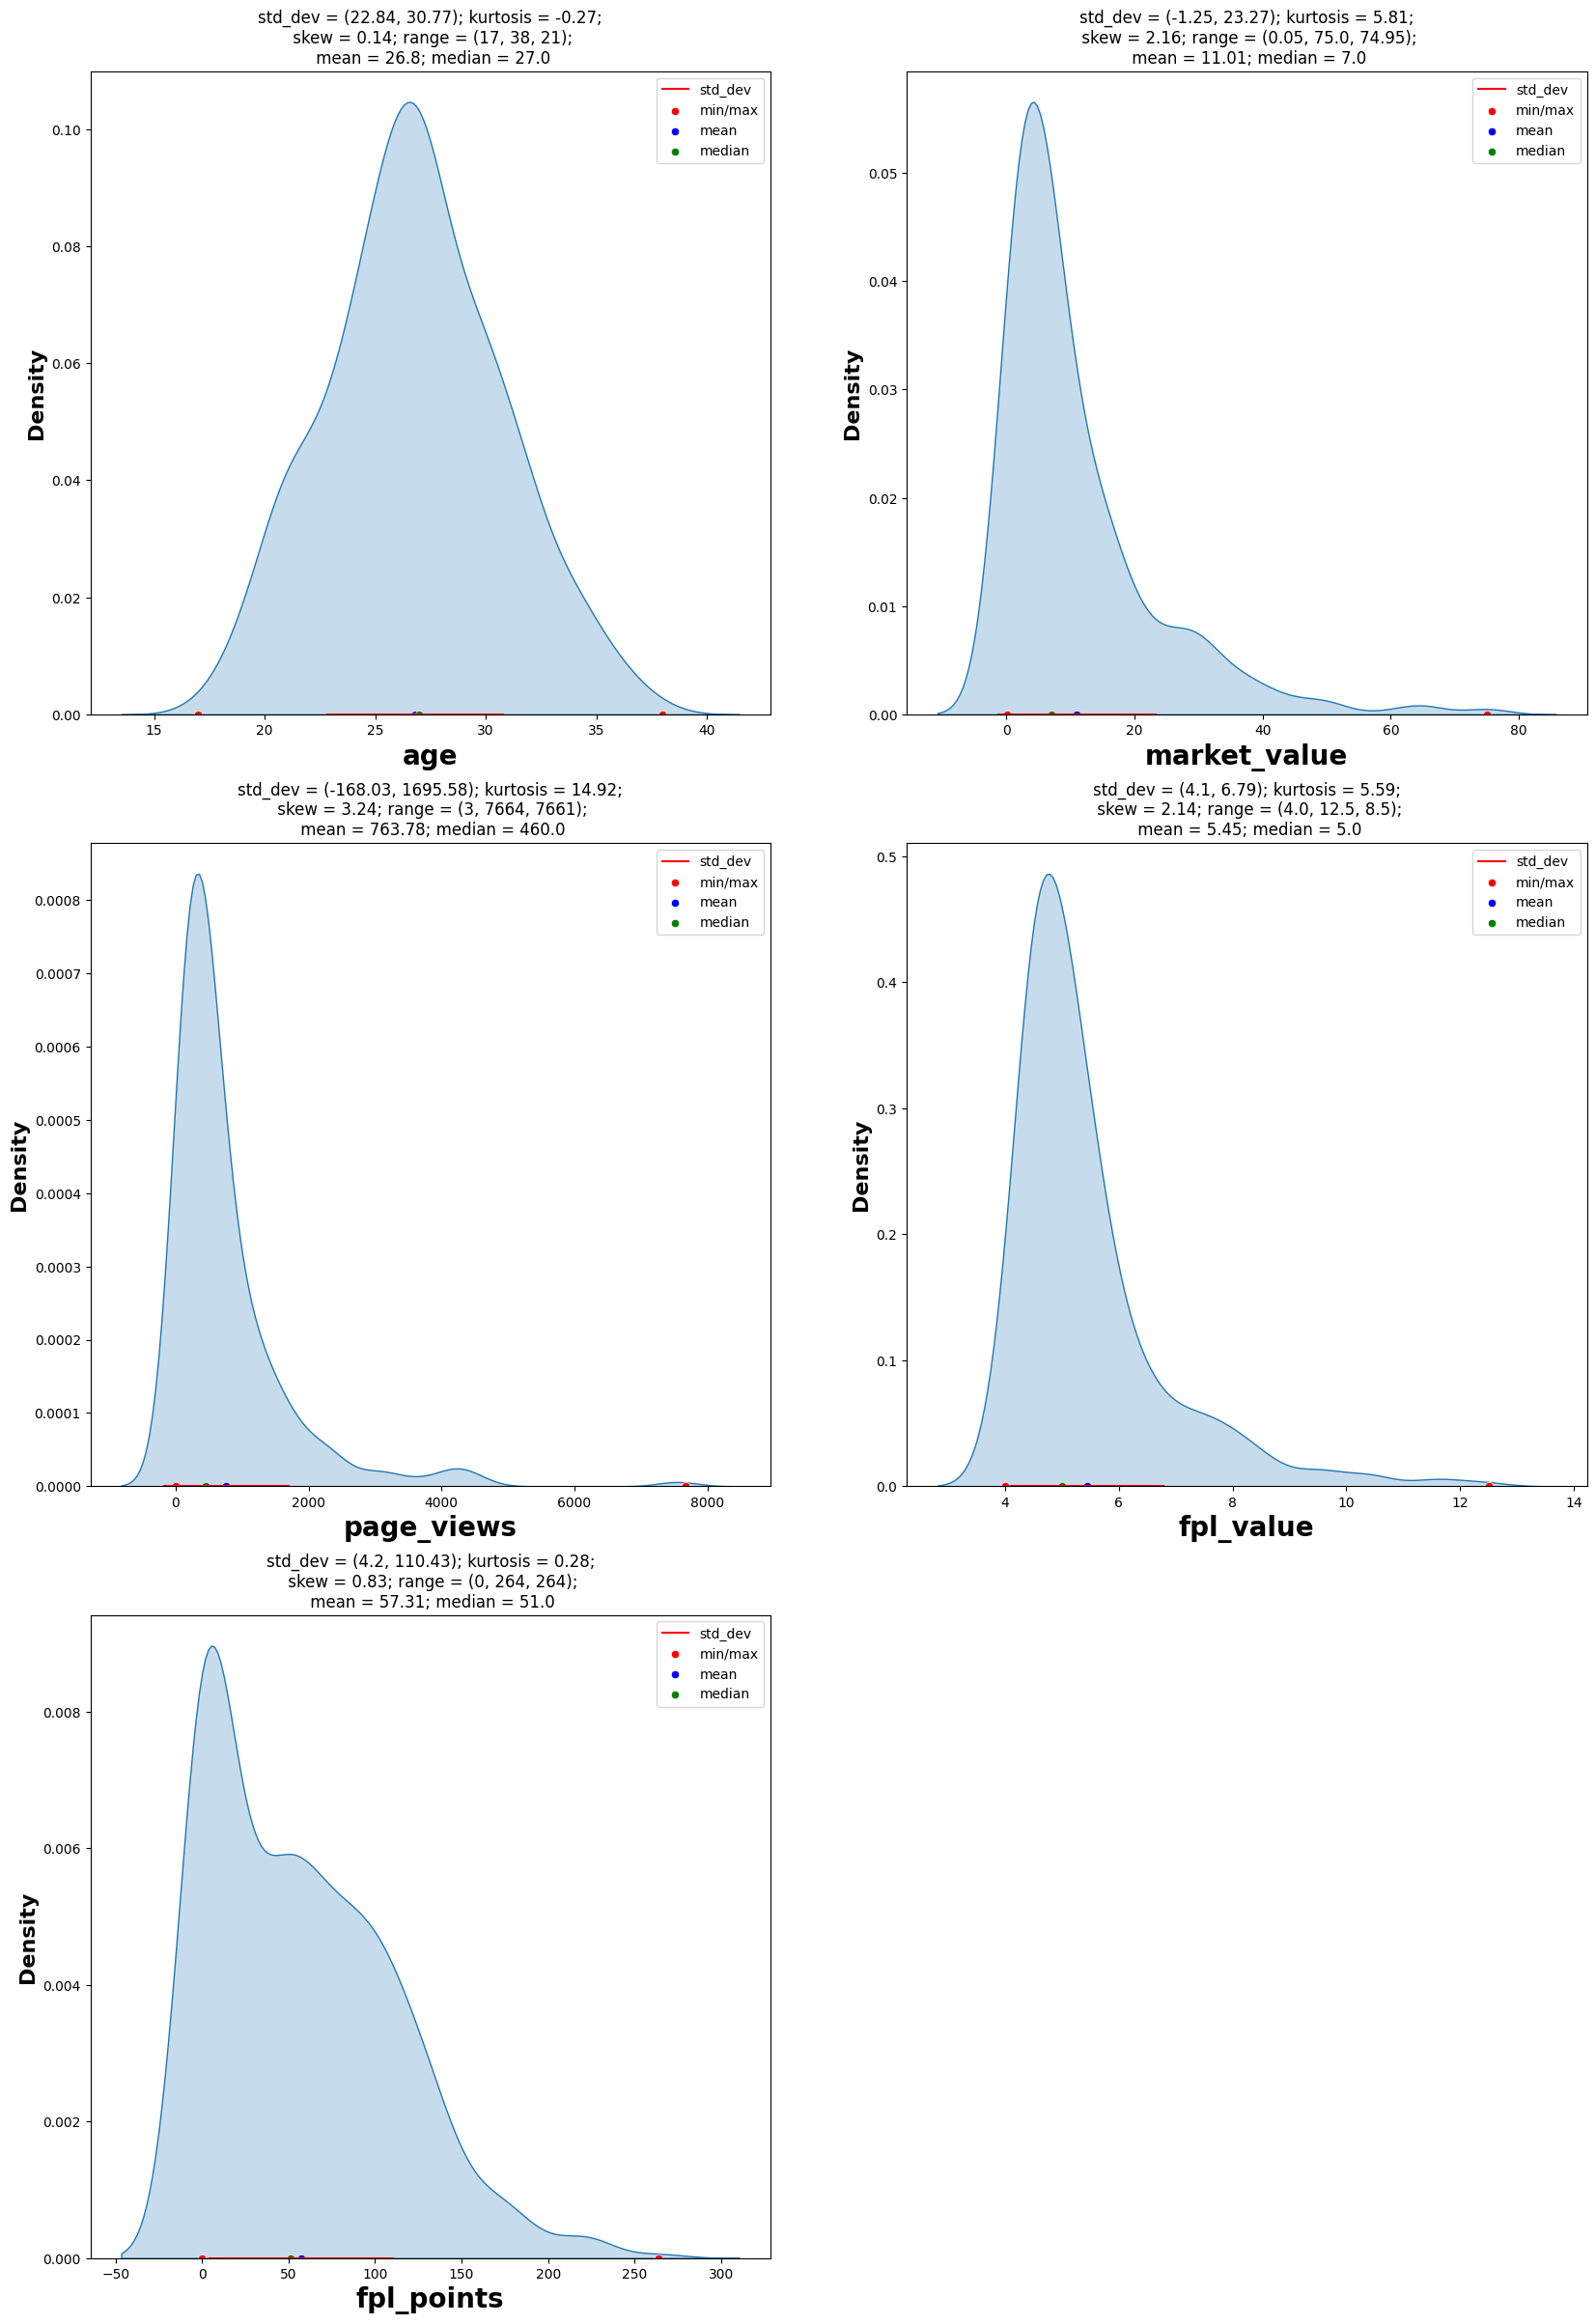

In [ ]:
UVA_numeric(data,numerical,(3,2))

### **Observations**
* The age of the players lies in the range of 17-38. The distribution of age is very close to gaussian distribution.
* 68.27% players age lies in the range of 22-30.
* Average age of the players is 26.8
* The distribution of market_value is right skewed and the range of values lies in 0.05-75.0.
* The distribution of page views and fpl values is right skewed distribution.
* Since the mean and median value of market_value, page_views and fpl_values are very different from each other, therefore there may be a chances of presence of outliers.
* The distribution of fpl points is close to gaussian distribution.

**Inferences**
* Since Linear regression assumes that all features should have gassuaian distribution, so we have to remove skewnees from all the features.

In [ ]:
data['fpl_sel'].head()

0    17.1
1     5.6
2     5.9
3     1.5
4     0.7
Name: fpl_sel, dtype: float32

(array([ 12.,  38.,  43.,  75., 108.,  69.,  57.,  32.,  19.,   8.]),
 array([17. , 19.1, 21.2, 23.3, 25.4, 27.5, 29.6, 31.7, 33.8, 35.9, 38. ]),
 <a list of 10 Patch objects>)

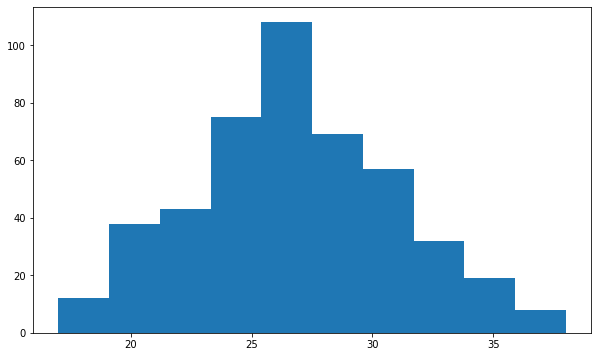

In [ ]:
plt.figure(figsize = (10,6))
plt.hist(data['age'])

(array([251., 111.,  35.,  34.,  10.,  10.,   4.,   1.,   3.,   2.]),
 array([5.0000e-02, 7.5450e+00, 1.5040e+01, 2.2535e+01, 3.0030e+01,
        3.7525e+01, 4.5020e+01, 5.2515e+01, 6.0010e+01, 6.7505e+01,
        7.5000e+01]),
 <a list of 10 Patch objects>)

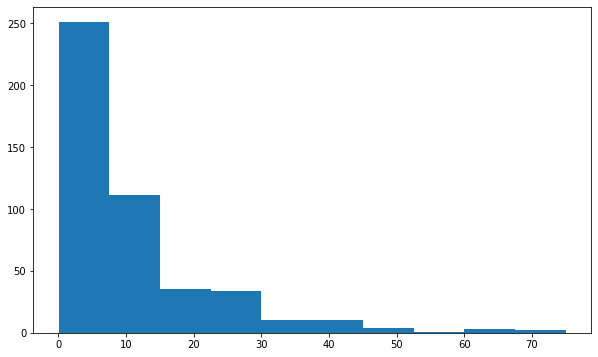

In [ ]:
plt.figure(figsize = (10,6))
plt.hist(data['market_value'])

(array([326.,  78.,  30.,  10.,   6.,   8.,   1.,   0.,   0.,   2.]),
 array([3.0000e+00, 7.6910e+02, 1.5352e+03, 2.3013e+03, 3.0674e+03,
        3.8335e+03, 4.5996e+03, 5.3657e+03, 6.1318e+03, 6.8979e+03,
        7.6640e+03]),
 <a list of 10 Patch objects>)

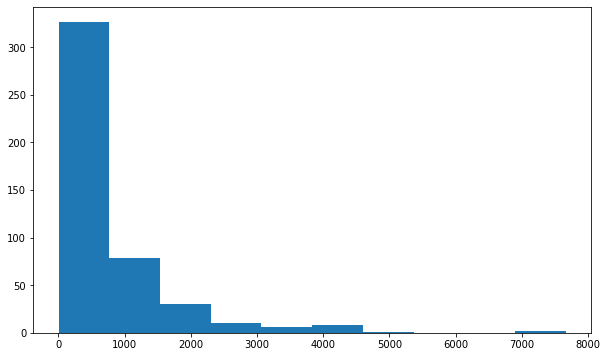

In [ ]:
plt.figure(figsize = (10,6))
plt.hist(data['page_views'])

(array([162., 184.,  54.,  14.,  25.,   9.,   4.,   5.,   2.,   2.]),
 array([ 4.  ,  4.85,  5.7 ,  6.55,  7.4 ,  8.25,  9.1 ,  9.95, 10.8 ,
        11.65, 12.5 ]),
 <a list of 10 Patch objects>)

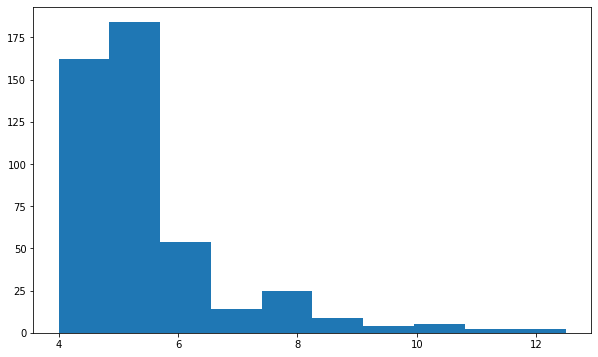

In [ ]:
plt.figure(figsize = (10,6))
plt.hist(data['fpl_value'])

(array([172.,  69.,  71.,  64.,  41.,  23.,  13.,   2.,   5.,   1.]),
 array([  0. ,  26.4,  52.8,  79.2, 105.6, 132. , 158.4, 184.8, 211.2,
        237.6, 264. ]),
 <a list of 10 Patch objects>)

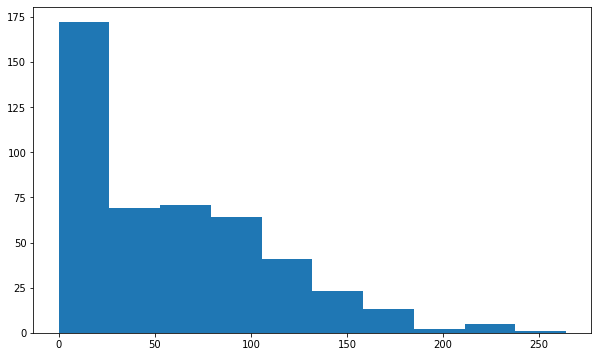

In [ ]:
plt.figure(figsize = (10,6))
plt.hist(data['fpl_points'])

## **6.2 Univariate Analysis: Categorical**
In this section we are going to explore and analyze the categorical features, their classes and finding important information from the dataset.

* Let's make a list of all the categorical features

In [ ]:
cat_features = data.select_dtypes(include = ['object']).dtypes.index
cat_features

Index(['name', 'club', 'position', 'position_cat', 'region', 'nationality',
       'new_foreign', 'age_cat', 'club_id', 'big_club', 'new_signing'],
      dtype='object')

* Let's make a custom function for easy visualization of univariat categorical.


In [ ]:
def UVA_Categorical(data, cat):
  plt.figure(figsize = (10,6))
  sns.countplot(cat, data = data)
  plt.xlabel(cat,fontsize = 14, fontweight = 'bold')
  plt.ylabel('Count',fontsize = 14, fontweight = 'bold')
  plt.title('nunique: {} \n Value counts: \n{}'.format(data[cat].nunique(),data[cat].value_counts(normalize = True)))

  # Rotating xticklabels
  if len(data[cat].value_counts()) > 7:
    X = plt.gca().xaxis
    for item in X.get_ticklabels():
      item.set_rotation(90)
  plt.show()

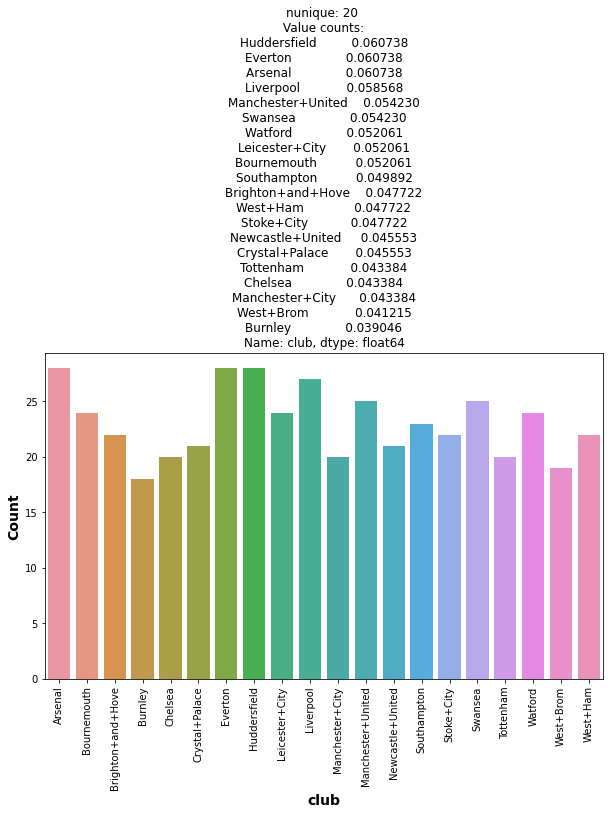

In [ ]:
UVA_Categorical(data,'club')

### **Observations**
* Total number of clubs in which the players belong are 20
* Arsenal, Huddersfield and Everton has same number of clubs count
* Number of players belong to Burnley is almost 2/3rd that of Everton,Arsenal and Huddersfield.

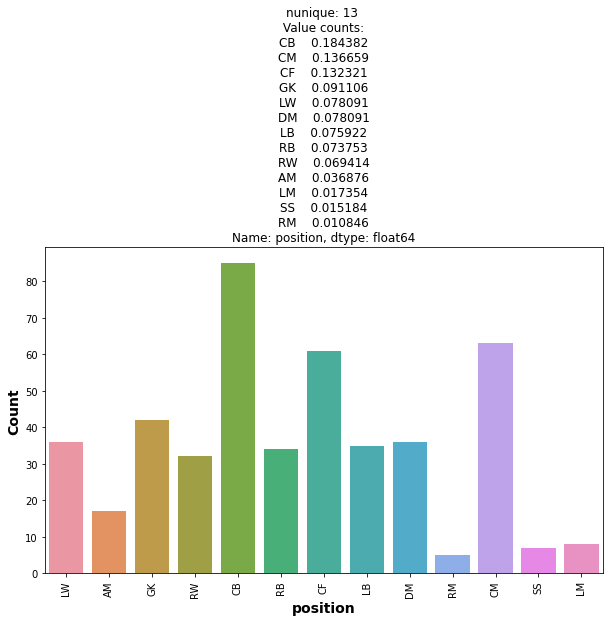

In [ ]:
UVA_Categorical(data,'position')

### **Observations**
* Total number of positions of a players in a fottbal match are 13 positions.
* 18% of the players plays at position CB while 13% of the players plays at position CF and CM.
* Number of players plays at position RM, SS, LM are 1%, 1.5% and 1.7% respectively.
* Players plays at positiont CB are more than 18 times the players plays at position RM.

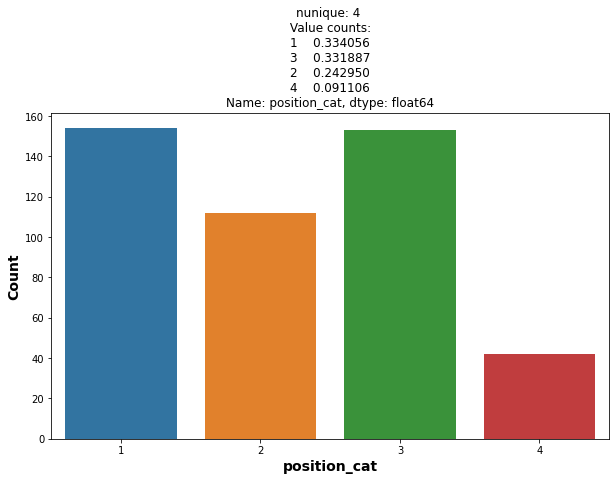

In [ ]:
UVA_Categorical(data,'position_cat')

### **Observations**
* There are total of 4 types of position category of the player
* Players belong to category 1 and 3 are same in numbers while players belong to category 4 are only 9%.
* Players belong to category 1 and 3 are almost 3.5 times the players belong to category 4.


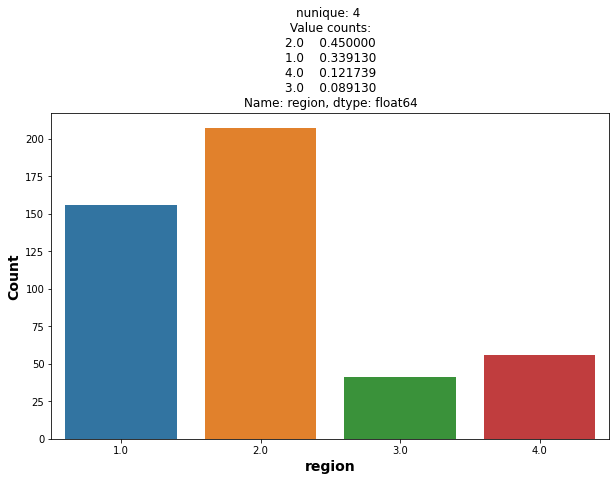

In [ ]:
UVA_Categorical(data,'region')

### **Observations**
* Most of the players i.e 45% belongs to the region 2 and only 9% of the players belong to region 3.
* Players belong to region 1 are approximately 3 times the players belong to region 4.


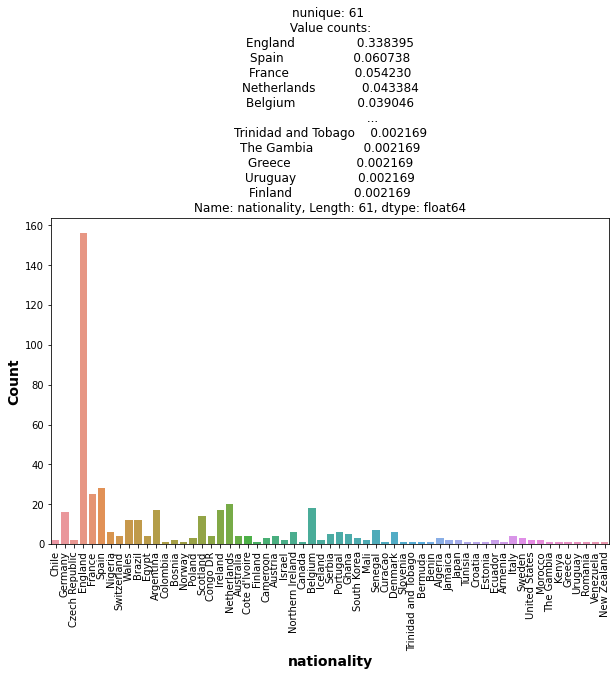

In [ ]:
UVA_Categorical(data,'nationality')

### **Observations**
* There are total of 61 nationality where the players belong.


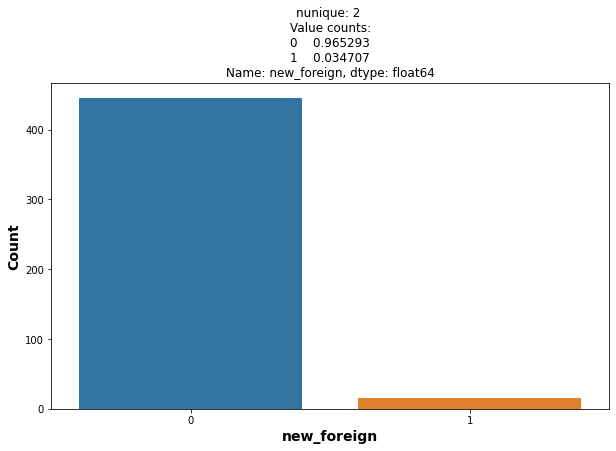

In [ ]:
UVA_Categorical(data,'new_foreign')

### **Observations:**
* 96.5% of the players does not belong to new_foriegn while only 3.4% of the players belong to the new_foriegn.


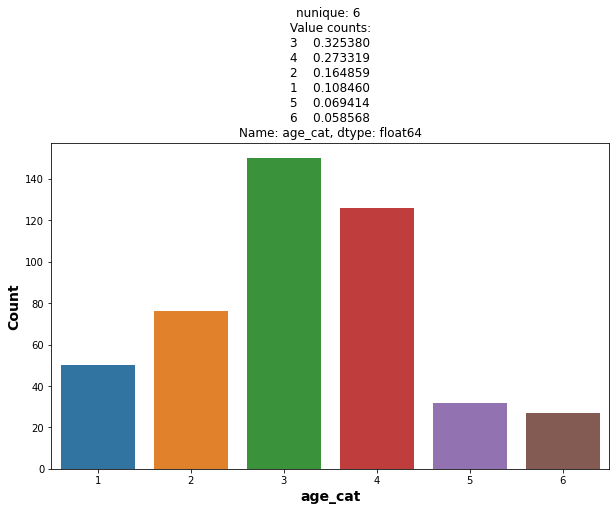

In [ ]:
UVA_Categorical(data, 'age_cat')

### **Observations:**
* 32% of the players belong to age_cat 3 while 27% of the players belong to the age_cat 4
* Only 5.8% of the players belong the age_cat 5.


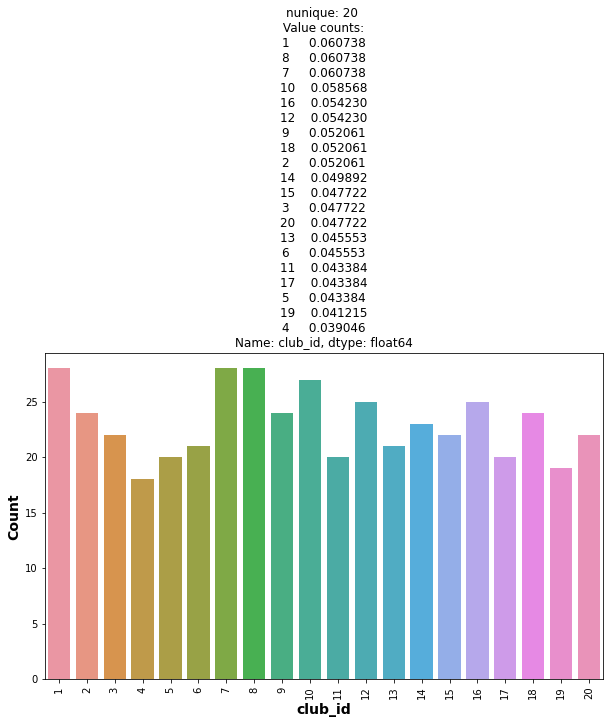

In [ ]:
UVA_Categorical(data,'club_id')

### **Observations:**
* There is same as club feature.

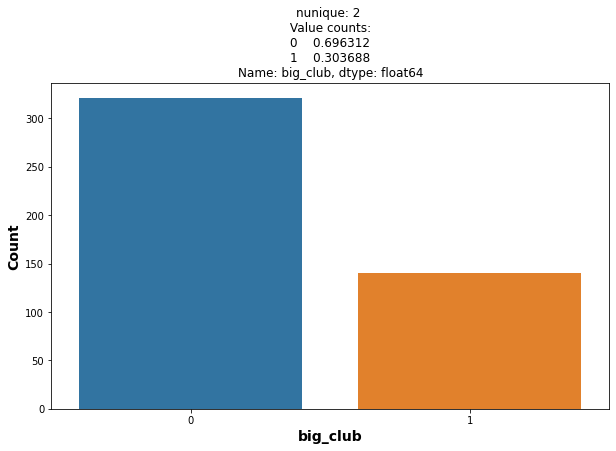

In [ ]:
UVA_Categorical(data,'big_club')

### **Observations:**
* 70% of the players are not the part of big_club while only 30% of the players are the part of the big club.


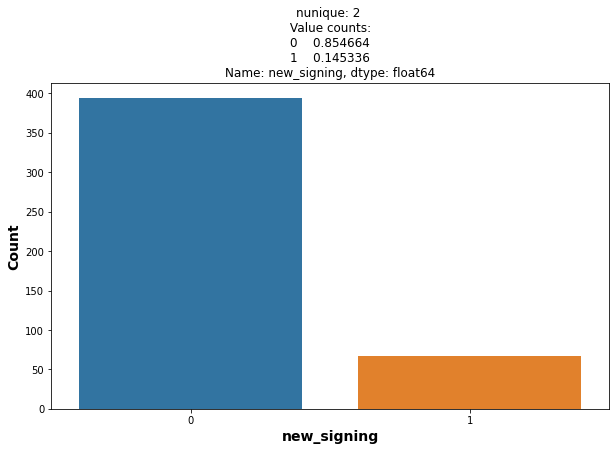

In [ ]:
UVA_Categorical(data,'new_signing')

### **Observations:**
* Only 14.5% of the players are the new signing one.


## **6.3 Missing Values**

In [ ]:
data.isnull().sum()

name            0
club            0
age             0
position        0
position_cat    0
market_value    0
page_views      0
fpl_value       0
fpl_sel         0
fpl_points      0
region          1
nationality     0
new_foreign     0
age_cat         0
club_id         0
big_club        0
new_signing     0
dtype: int64

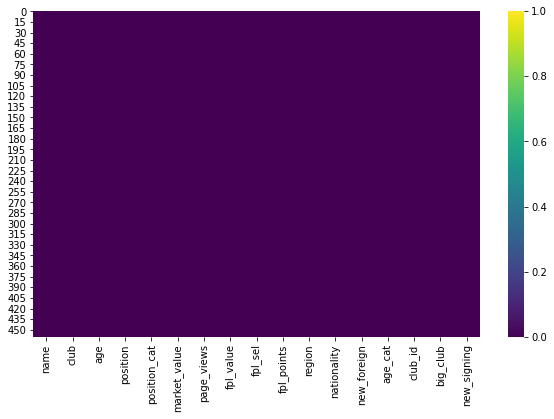

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cmap = 'viridis')

### **Observations:**
* There is only one mising values in the dataset in which region has one missing values.


## **7. Bivariate Analysis**

### **Bivariate Analysis: Numerical- Numerical**
In this section we are going to explore and analyze the data with two numerical features taking at a time.

### **Hypothesis falling under this section.**

* Does age of a player has impacted the market_value of a customer.
* Are more pagev_views of a player are more likely to have a more market)value of a customer.
* Is greater fpl_value of a player has high market value
* Is higher fpl_points have high market_value
* Is higher fpl_sel have high market_value.


In [ ]:
numerical = data.select_dtypes(include = ['int64','float64','Int64'])
numerical.dtypes.index

Index(['age', 'market_value', 'page_views', 'fpl_value', 'fpl_points'], dtype='object')

### Correlation matrix using Pearson and Spearman correlation.

In [ ]:
numerical.corr(method = 'pearson')

,age,market_value,page_views,fpl_value,fpl_points
age,1.000000,-0.132396,-0.048682,-0.097659,0.187785
market_value,-0.132396,1.000000,0.739657,0.788653,0.615155
page_views,-0.048682,0.739657,1.000000,0.730640,0.542464
fpl_value,-0.097659,0.788653,0.730640,1.000000,0.618837
fpl_points,0.187785,0.615155,0.542464,0.618837,1.000000


In [ ]:
numerical.corr(method='spearman')

,age,market_value,page_views,fpl_value,fpl_points
age,1.000000,-0.137461,-0.046368,-0.081579,0.221017
market_value,-0.137461,1.000000,0.746182,0.758359,0.563958
page_views,-0.046368,0.746182,1.000000,0.712735,0.557508
fpl_value,-0.081579,0.758359,0.712735,1.000000,0.538584
fpl_points,0.221017,0.563958,0.557508,0.538584,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text major ticklabel objects>)

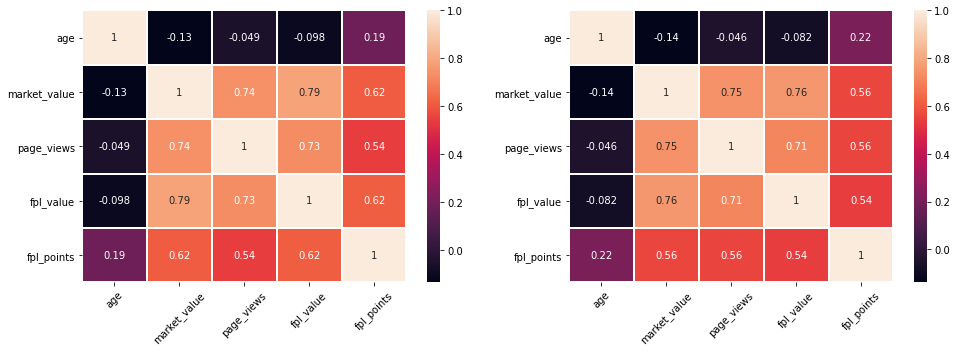

In [ ]:
plt.figure(figsize = (16,5))
plt.subplot(1,2,1)
sns.heatmap(numerical.corr(method = 'pearson'), cbar = True, annot = True,linewidths = 1)
plt.xticks(rotation = 45)

plt.subplot(1,2,2)
sns.heatmap(numerical.corr(method = 'spearman'), cbar = True, annot = True,linewidths = 1)
plt.xticks(rotation = 45)

### **Observations:**
* Page_views and market_values(target variable) are highly correlated with each.
* fpl_value and market_values(target variable) are also highly correlated with each.
* fpl_points and market_values(target variable) are also highly correlated with each.
* page_views --> fpl_value
* page_views --> fpl_points
* fpl_points --> fpl_values

### **Inference**
* Page views, fpl_values and fpl points are important features.
* Age does not have much impact on market_value
* Higher the page_views higher the market value of a player
* Greater the fpl_sel, fpl_value, fpl_points higher the market_value.

### **7.2 Bivariate Analysis: Numerical -Categorical**
* In this section we are going to analyze our data with one categorical feature and a target variable(numerical) and also perform some hypothesis testing falling in this section.

### **Hypothesis falling under this section**
* Does club plays any significant role in the market_value of a customer.
* Are position_cat effects the market_value of a customer.
* Does the region of player in which they live has iny impact on the market value of a player
* Are the players belonging to new foiregn have high market_value.
* what is the impact of age_cat on the marjket_value.
* Are the players belong to big_club has high market_value.
* Does new signing players has low market_value.



 



In [ ]:
categorical = data.select_dtypes(include = 'object')
categorical.dtypes.index

Index(['name', 'club', 'position', 'position_cat', 'region', 'nationality',
       'new_foreign', 'age_cat', 'club_id', 'big_club', 'new_signing'],
      dtype='object')

## **ANOVA TEST**
Since there are some features who has more than two categories. In this situation we are going to perform Anova test.

Analysis of variance (ANOVA) is a statistical technique that is used to check if the means of two or more groups are significantly different from each other. ANOVA checks the impact of one or more factors by comparing the means of different samples.

* The statistic which measures if the means of different samples are significantly different or not is called the F-Ratio. Lower the F-Ratio, more similar are the sample means. In that case, we cannot reject the null hypothesis.

In [ ]:
def Bivariate_cont_cat(data, cont, cat, p_value, f_value, sign_level):

  # Checking hypothesis
  if p_value < sign_level and f_value > 1:
    sign = True
  else :
    sign = False

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)
  

  # Visualization
  plt.figure(figsize = (20,6),dpi = 120)
  

  # barplot
  plt.subplot(1,3,1)
  sns.barplot(x = cat, y = cont, data = data, hue = cat)
  plt.title('anova-test P value = {} \n anova_test F value = {} \n Significant difference = {} \n{}'.format(p_value, f_value, sign, table))
   # Rotating xticklabels
  if len(data[cat].value_counts()) > 7:
    X = plt.gca().xaxis
    for item in X.get_ticklabels():
      item.set_rotation(90)

  

  # Kdeplot
  plt.subplot(1,3,2)
  sns.kdeplot(cont, hue = cat, data = data,shade = True)
  plt.title('Category Distribution', fontsize = 14, fontweight = 'bold')

  # Boxplot for checking Outliers
  plt.subplot(1,3,3)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot',fontsize = 14, fontweight = 'bold')
  
   # Rotating xticklabels
  if len(data[cat].value_counts()) > 7:
    X = plt.gca().xaxis
    for item in X.get_ticklabels():
      item.set_rotation(90)

* **Does club plays any significant role in the market_value of a customer.**

In [ ]:
data['club'].unique()

array(['Arsenal', 'Bournemouth', 'Brighton+and+Hove', 'Burnley',
       'Chelsea', 'Crystal+Palace', 'Everton', 'Huddersfield',
       'Leicester+City', 'Liverpool', 'Manchester+City',
       'Manchester+United', 'Newcastle+United', 'Southampton',
       'Stoke+City', 'Swansea', 'Tottenham', 'Watford', 'West+Brom',
       'West+Ham'], dtype=object)

In [ ]:
df_anova = data[['market_value','club']]
grouped_anova = df_anova.groupby(['club'])
grouped_anova.head()
from scipy import stats
f_value, p_value = stats.f_oneway(grouped_anova.get_group('Arsenal')['market_value'],grouped_anova.get_group('Bournemouth')['market_value'],
                               grouped_anova.get_group('Brighton+and+Hove')['market_value'], grouped_anova.get_group('Burnley')['market_value'],
                               grouped_anova.get_group('Chelsea')['market_value'],grouped_anova.get_group('Crystal+Palace')['market_value'],grouped_anova.get_group('Everton')['market_value'],
                               grouped_anova.get_group('Huddersfield')['market_value'],grouped_anova.get_group('Leicester+City')['market_value'],grouped_anova.get_group('Liverpool')['market_value'],
                               grouped_anova.get_group('Manchester+City')['market_value'],grouped_anova.get_group('Manchester+United')['market_value'],grouped_anova.get_group('Newcastle+United')['market_value'],
                               grouped_anova.get_group('Southampton')['market_value'],grouped_anova.get_group('Stoke+City')['market_value'],grouped_anova.get_group('Swansea')['market_value'],
                               grouped_anova.get_group('Tottenham')['market_value'],grouped_anova.get_group('Watford')['market_value'],grouped_anova.get_group('West+Brom')['market_value'],
                               grouped_anova.get_group('West+Ham')['market_value'])
              
print(f_value, p_value)

16.7901035916832 4.1449607630813407e-41


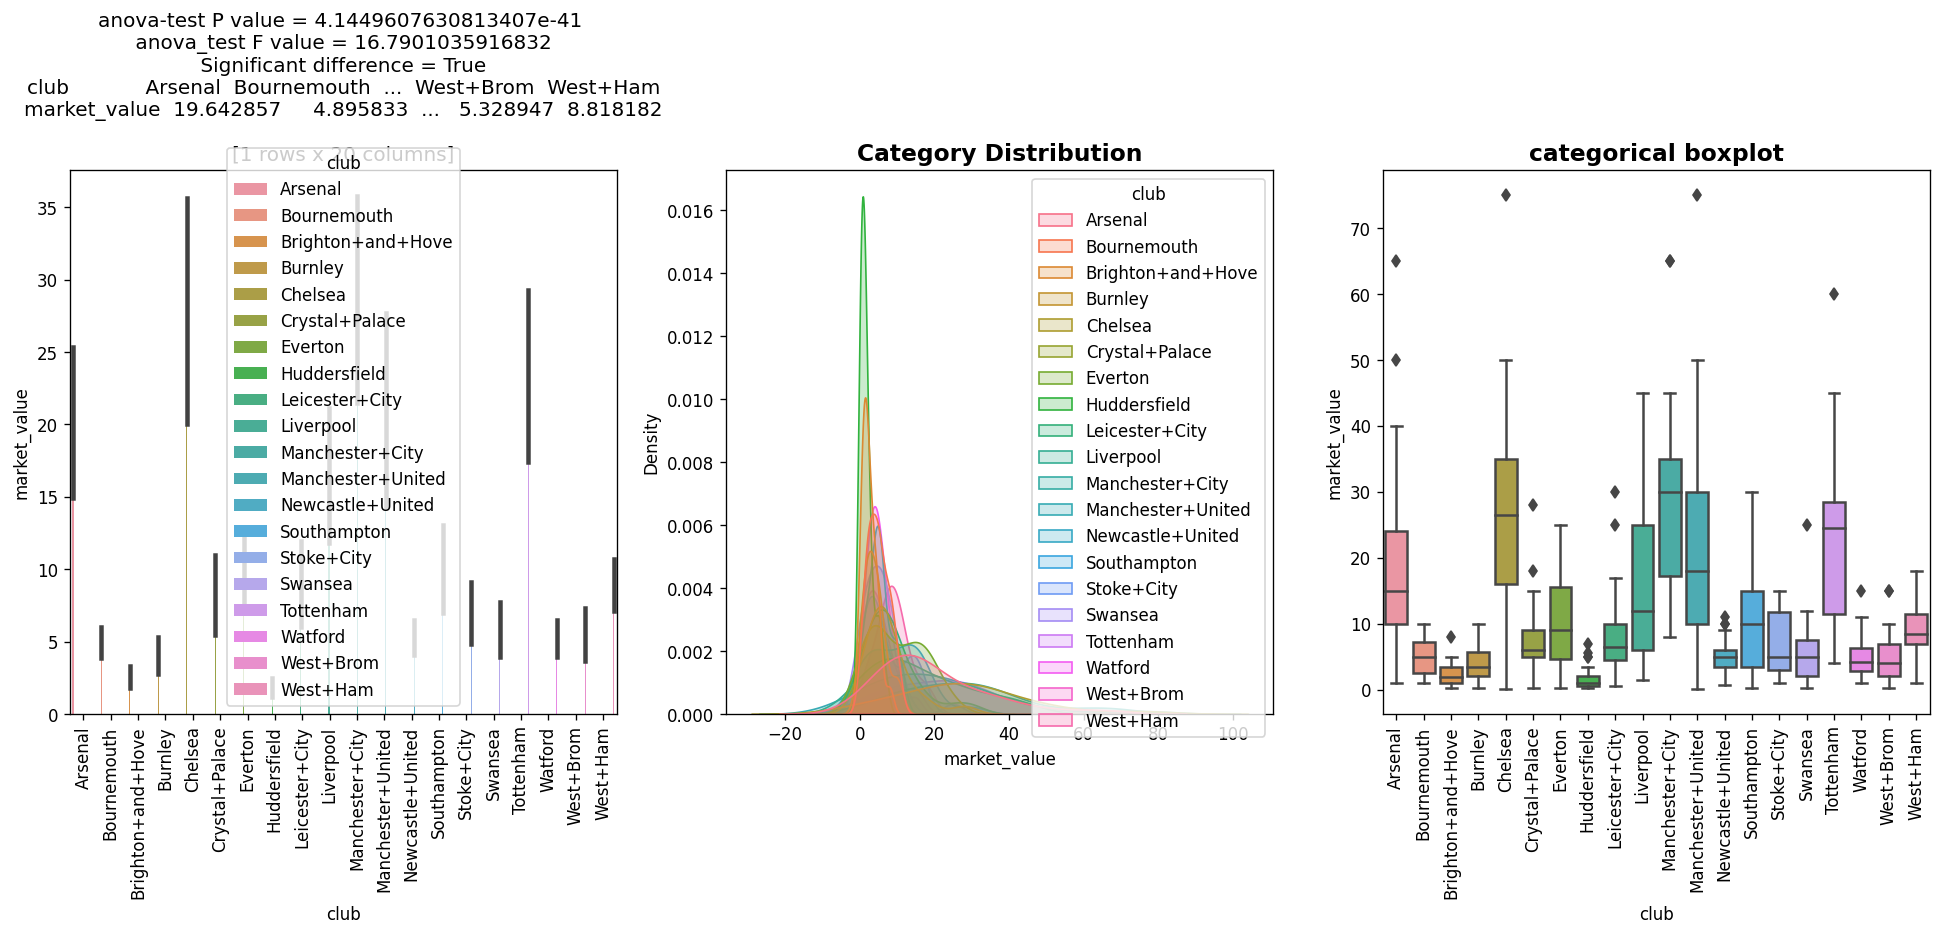

In [ ]:
Bivariate_cont_cat(data,'market_value','club',p_value,f_value,0.05)

### **Observations**
* Yes there is a significant sdifference between the different categories of the club.
* The distribution of all clubs are differnt therefore it is considered as a important feautre for model training.
* Outliers are present in the market_value for a different categories of club.


* **Are position effects the market_value of a customer.**

In [ ]:
data['position'].unique()

array(['LW', 'AM', 'GK', 'RW', 'CB', 'RB', 'CF', 'LB', 'DM', 'RM', 'CM',
       'SS', 'LM'], dtype=object)

In [ ]:
df_anova = data[['market_value','position']]
grouped_anova = df_anova.groupby(['position'])
grouped_anova.head()
from scipy import stats
f_value, p_value = stats.f_oneway(grouped_anova.get_group('LW')['market_value'],grouped_anova.get_group('AM')['market_value'],
                               grouped_anova.get_group('GK')['market_value'], grouped_anova.get_group('RW')['market_value'],
                               grouped_anova.get_group('CB')['market_value'],grouped_anova.get_group('RB')['market_value'],
                               grouped_anova.get_group('CF')['market_value'],grouped_anova.get_group('LB')['market_value'],grouped_anova.get_group('DM')['market_value'],
                               grouped_anova.get_group('RM')['market_value'],grouped_anova.get_group('CM')['market_value'],grouped_anova.get_group('SS')['market_value'],
                               grouped_anova.get_group('LM')['market_value'])
              
print(f_value, p_value)

3.974203394220708 7.453953648312807e-06


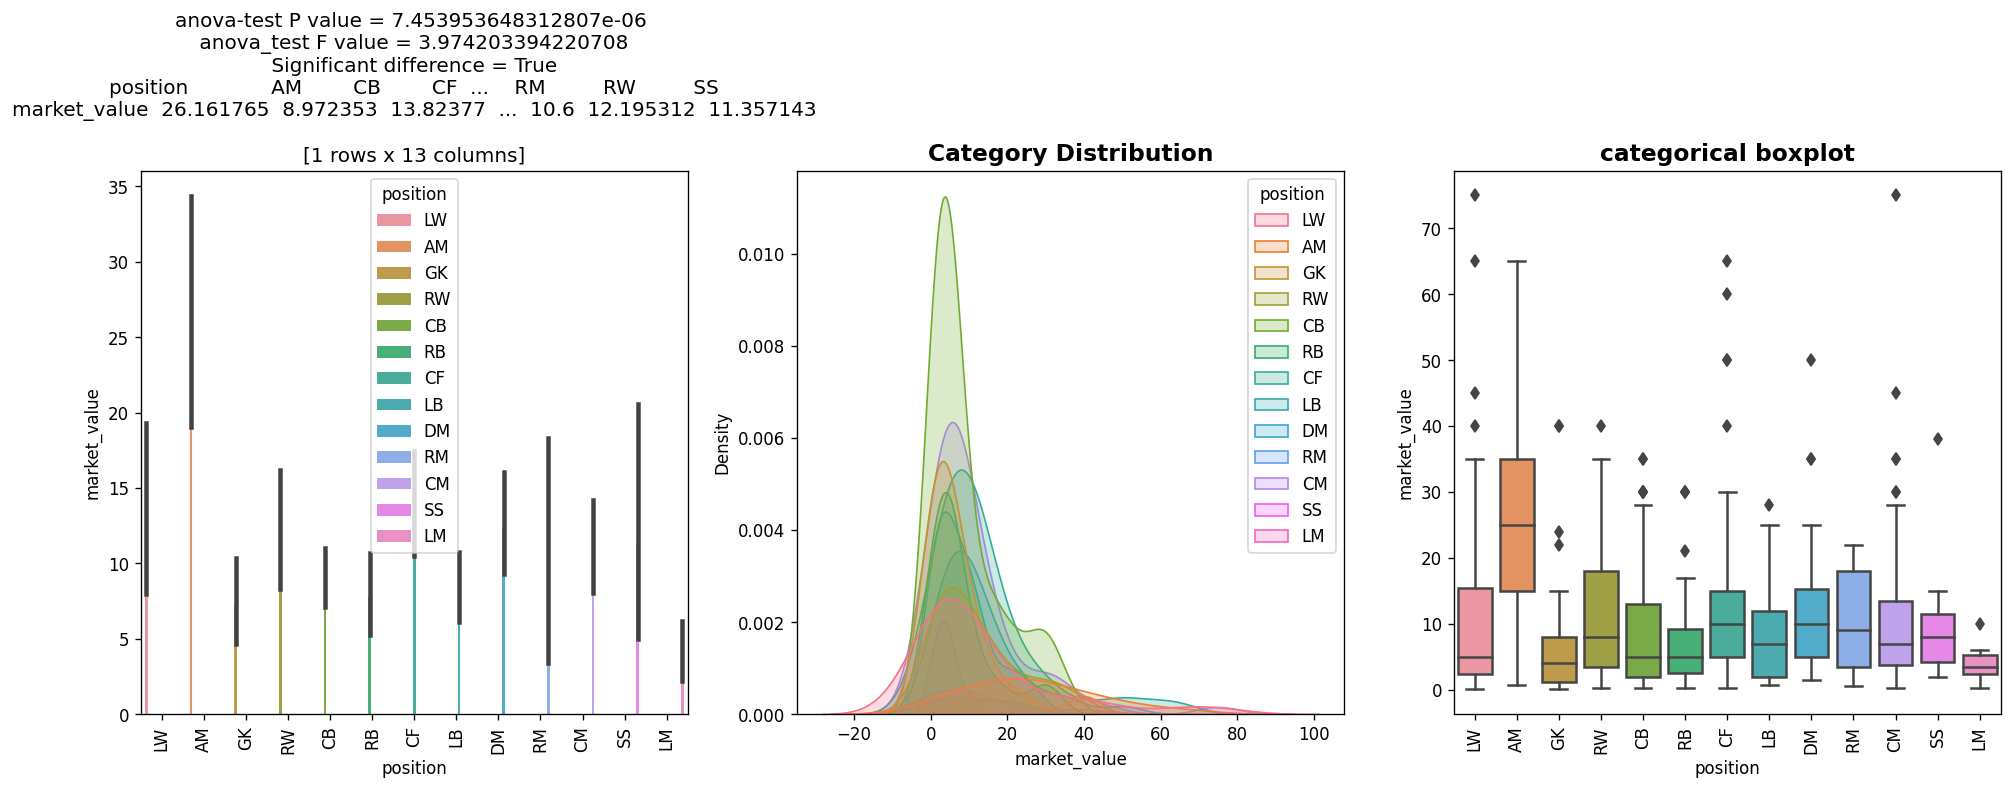

In [ ]:
Bivariate_cont_cat(data,'market_value','position',p_value,f_value,0.05)

### **Observations**
* Yes there is a significant sdifference between the different categories of the position.
* The distribution of all positions are differnt therefore it is considered as a important feautre for model training.
* Yes, the position of a player effects the market_value of a customer.

In [ ]:
data['position_cat'].value_counts()

1    154
3    153
2    112
4     42
Name: position_cat, dtype: int64

In [ ]:
df_anova = data[['market_value','position_cat']]
grouped_anova = df_anova.groupby(['position_cat'])
grouped_anova.head()
from scipy import stats
f_value, p_value = stats.f_oneway(grouped_anova.get_group(1)['market_value'],grouped_anova.get_group(2)['market_value'],
                               grouped_anova.get_group(3)['market_value'], grouped_anova.get_group(4)['market_value'])
              
print(f_value, p_value)

7.859227790711039 4.010033695583066e-05


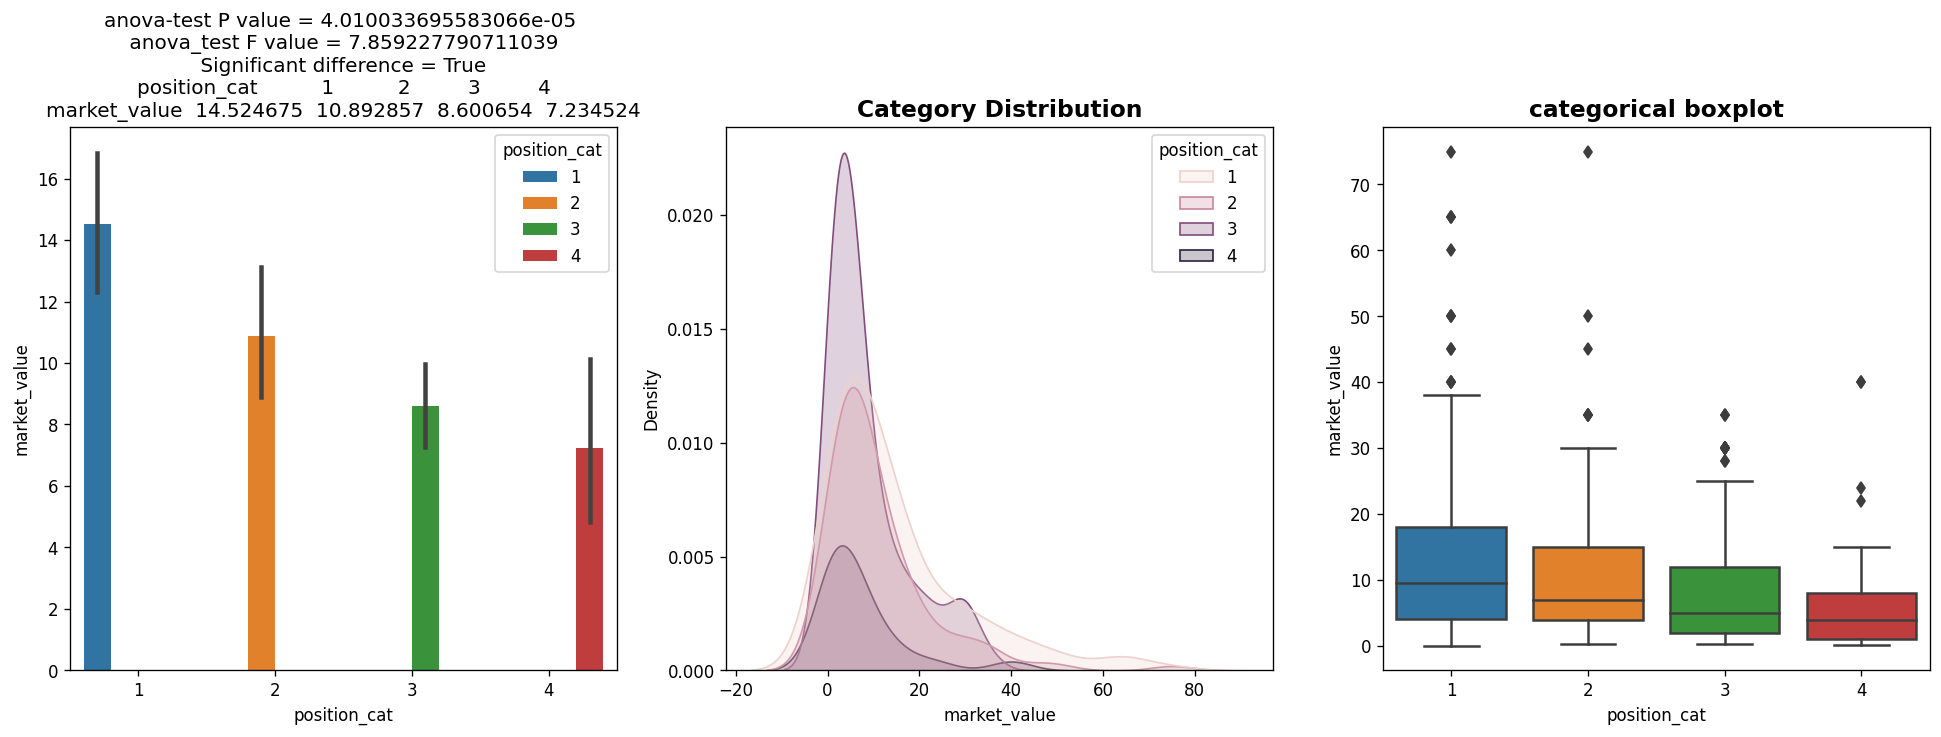

In [ ]:
Bivariate_cont_cat(data,'market_value','position_cat',p_value,f_value,0.05)

### **Observations**
* Yes there is a significant difference between in the position category of the players.
* Market_value for the attackers(1) is the highest and goes on decreasing for midfielders, defendersa and then goalkeepers.


In [ ]:
data['region'].unique()

array([3.0, 2.0, 1.0, 4.0, nan], dtype=object)

In [ ]:
data.columns

Index(['name', 'club', 'age', 'position', 'position_cat', 'market_value',
       'page_views', 'fpl_value', 'fpl_sel', 'fpl_points', 'region',
       'nationality', 'new_foreign', 'age_cat', 'club_id', 'big_club',
       'new_signing'],
      dtype='object')

### **Checking Outliers**

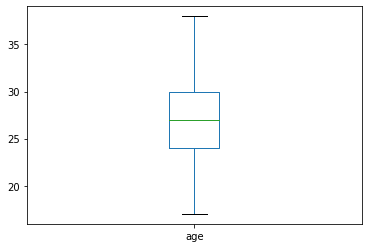

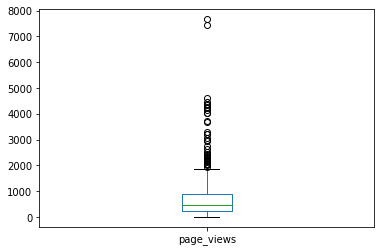

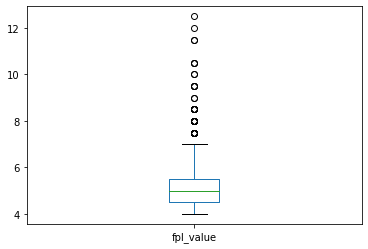

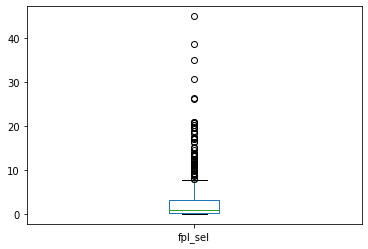

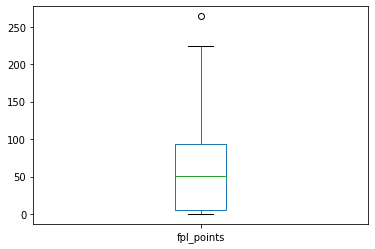

In [ ]:
col = ['age','page_views','fpl_value','fpl_sel','fpl_points']
for i in col: 
    data[i].plot.box()
    plt.show()

### **Handling Outliers**

In [ ]:
#from scipy.stats import zscore
#df = data[['page_views','fpl_sel','fpl_value']]
#z = np.abs(zscore(df))
#threshold = 3
#np.where(z>3)

#data_new = data[(z<3).all(axis = 1)]
#data_new.head()

In [ ]:
# Calculating percent loss
#loss = ((data.shape[0]-data_new.shape[0])/data.shape[0])*100
#print('Loss of data after removing outliers is : ',loss)

### **Observations:**
* Loss of data after removing outliers is less than 5% there fore we can go with this.
*Removing outliers decreases the performance of the model.

## **8. Feature Engineering**

In [ ]:
df = data.copy()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          461 non-null    object 
 1   club          461 non-null    object 
 2   age           461 non-null    int64  
 3   position      461 non-null    object 
 4   position_cat  461 non-null    object 
 5   market_value  461 non-null    float64
 6   page_views    461 non-null    int64  
 7   fpl_value     461 non-null    float64
 8   fpl_sel       461 non-null    float32
 9   fpl_points    461 non-null    int64  
 10  region        460 non-null    object 
 11  nationality   461 non-null    object 
 12  new_foreign   461 non-null    object 
 13  age_cat       461 non-null    object 
 14  club_id       461 non-null    object 
 15  big_club      461 non-null    object 
 16  new_signing   461 non-null    object 
dtypes: float32(1), float64(2), int64(3), object(11)
memory usage: 59.6+ KB


In [ ]:
#convert all object into numeric data type
df['new_signing'] = df['new_signing'].astype('int32')
df['big_club'] = df['big_club'].astype('int32')
df['club_id'] = df['club_id'].astype('int32')
df['age_cat'] = df['age_cat'].astype('int32')
df['new_foreign'] = df['new_foreign'].astype('int32')
df['position_cat'] = df['position_cat'].astype('int64')

### **Frequency Encoding**

In [ ]:
def frequency_encoding(data,cat):
  freq_enc = data.groupby(cat).size()/len(data)
  return  data[cat].map(freq_enc)

In [ ]:
data['club_freq'] = frequency_encoding(data,'club')
data['region_freq'] = frequency_encoding(data,'region')
data['position_freq'] = frequency_encoding(data,'position')
data['position_cat_freq'] = frequency_encoding(data,'position_cat')
data['position_freq'] = frequency_encoding(data,'position')

### **One Hot encoding:**
* Since the club, region and position features are nominal categorical features therefore apply one hot encoding to covert it into numeric type

In [ ]:
#onehot encoding
df = pd.get_dummies(df, columns=['club','region', 'position'], drop_first=True)

In [ ]:
df.set_index('name', inplace=True)
df.drop(columns=['nationality','club_id'], inplace=True)

In [ ]:
df.head()

,age,position_cat,market_value,page_views,fpl_value,fpl_sel,fpl_points,new_foreign,age_cat,big_club,new_signing,club_Bournemouth,club_Brighton+and+Hove,club_Burnley,club_Chelsea,club_Crystal+Palace,club_Everton,club_Huddersfield,club_Leicester+City,club_Liverpool,club_Manchester+City,club_Manchester+United,club_Newcastle+United,club_Southampton,club_Stoke+City,club_Swansea,club_Tottenham,club_Watford,club_West+Brom,club_West+Ham,region_2.0,region_3.0,region_4.0,position_CB,position_CF,position_CM,position_DM,position_GK,position_LB,position_LM,position_LW,position_RB,position_RM,position_RW,position_SS
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Alexis Sanchez,28,1,65.0,4329,12.0,17.1,264,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
Mesut Ozil,28,1,50.0,4395,9.5,5.6,167,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Petr Cech,35,4,7.0,1529,5.5,5.9,134,0,6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
Theo Walcott,28,1,20.0,2393,7.5,1.5,122,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
Laurent Koscielny,31,3,22.0,912,6.0,0.7,121,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0


* **Separate the independent and dependent data.**

In [ ]:
X = df.drop(columns=['market_value'], axis=1)
Y = df['market_value']

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=10, test_size=0.2)
print(x_train.shape, x_test.shape, y_test.shape, y_train.shape)



(368, 44) (93, 44) (93,) (368,)


## **9. Model Building and Evalution**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [ ]:
#Creating instances for each model
lr = LinearRegression()
knr = KNeighborsRegressor()
dtr = DecisionTreeRegressor()
svr = SVR()
rfr = RandomForestRegressor()
ls = Lasso()
rd = Ridge()
gbr = GradientBoostingRegressor()

In [ ]:
model = [lr, knr, dtr, svr, rfr, ls, rd,gbr]
for m in model:
    print(m)
    m.fit(x_train, y_train)
  
    pred_test = m.predict(x_test)
  
    
    print('Mean absolute error: ', mean_absolute_error(y_test,pred_test))
    print('Mean squared error: ', mean_squared_error(y_test,pred_test))
    print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,pred_test)))
    print('R2 Score: ', r2_score(y_test,pred_test))
    print('\n\n')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Mean absolute error:  3.9065773707870908
Mean squared error:  27.225967576081064
Root mean squared error:  5.217850857976018
R2 Score:  0.8086221988698368



KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
Mean absolute error:  4.888064516129031
Mean squared error:  56.25247634408602
Root mean squared error:  7.500165087788803
R2 Score:  0.6045879654864665



DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
Mean absolute error: 

## **10. Cross Validation**

In [ ]:
from sklearn.model_selection import cross_val_score
model = [lr, knr, dtr, svr, rfr, ls, rd,gbr]
for m in model: 
    print (m)
    i=[]
    for j in range (2,10):
        score = cross_val_score(m, X, Y, cv = j)
        cv_mean = score.mean()
        i.append(cv_mean)
        a = i.index(max(i))+2
        b = max(i)
    print(f'At cross fold {a} the cv score is {b}')
    print('\n')

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
At cross fold 2 the cv score is 0.76721852126496


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
At cross fold 2 the cv score is 0.577584396934157


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
At cross fold 4 the cv score is 0.5413607263577509


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
At cross fold 4 the cv score i

Observations:
* After model building and cross validation LinearRegression, Rdige Regression, Random Forest and Gradient Boosting Tree regrressor are the best model. 
* Now let's hypertune these model to select one model from this.

## **11. Hyperparameter Tuning**

* ## **Linear Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV
lr = LinearRegression()
parameters = {'fit_intercept': ['True','False'], 'normalize':['True','False'],'copy_X':['bool','True']}
grid_lr = GridSearchCV(lr, parameters, cv = 3, n_jobs = -1, verbose = 2)
grid_lr.fit(x_train, y_train)
y_pred_lr = grid_lr.predict(x_test)
print('Mean absolute error: ', mean_absolute_error(y_test,y_pred_lr))
print('Mean squared error: ', mean_squared_error(y_test,y_pred_lr))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,y_pred_lr)))
print('R2 Score: ', r2_score(y_test,y_pred_lr))

print(grid_lr.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Mean absolute error:  3.9065773707870854
Mean squared error:  27.225967576080947
Root mean squared error:  5.217850857976006
R2 Score:  0.8086221988698375
{'copy_X': 'bool', 'fit_intercept': 'True', 'normalize': 'True'}


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:    0.2s finished


* ## **Ridge Regression**

In [ ]:
rr = Ridge()
parameters = {'alpha': [1.0,2.0,3.0,4.0,5.0],'fit_intercept': ['True','False'], 'normalize':['True','False'],'copy_X':['bool','True'],
              'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],'max_iter':[50,100,300,500,800,1000,1500],'random_state':[1,10,15,30,50,67,128]}
grid_rr = GridSearchCV(rr, parameters, cv = 3, n_jobs = -1, verbose = 2)
grid_rr.fit(x_train, y_train)
y_pred_rr = grid_rr.predict(x_test)
print('Mean absolute error: ', mean_absolute_error(y_test,y_pred_rr))
print('Mean squared error: ', mean_squared_error(y_test,y_pred_rr))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,y_pred_rr)))
print('R2 Score: ', r2_score(y_test,y_pred_lr))

print(grid_rr.best_params_)

Fitting 3 folds for each of 13720 candidates, totalling 41160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 216 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 2152 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 9928 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 15768 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 22888 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 31320 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 41032 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 41160 out of 41160 | elapsed:  3.4min finished


Mean absolute error:  3.804113498841519
Mean squared error:  34.022323222698994
Root mean squared error:  5.832865781303303
R2 Score:  0.8086221988698375
{'alpha': 1.0, 'copy_X': 'bool', 'fit_intercept': 'True', 'max_iter': 50, 'normalize': 'True', 'random_state': 67, 'solver': 'sag'}


* ## **Random Forest Regrressor**

In [ ]:
rf = RandomForestRegressor()
parameters = {'n_estimators': [30, 50, 100, 150, 200],
 'bootstrap': [True, False],
 'max_depth': [5,8,10,12],
 'max_features': ['auto', 'sqrt','log2'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 3, 5],
 'criterion':['mse','mae']}

grid_rf = GridSearchCV(rf, parameters, cv = 3, n_jobs = -1, verbose = 2)
grid_rf.fit(x_train, y_train)
y_pred_rf = grid_rf.predict(x_test)
print('Mean absolute error: ', mean_absolute_error(y_test,y_pred_rf))
print('Mean squared error: ', mean_squared_error(y_test,y_pred_rf))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,y_pred_rf)))
print('R2 Score: ', r2_score(y_test,y_pred_rf))

print(grid_rf.best_params_)



Fitting 3 folds for each of 2160 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   26.0s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:   52.9s
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 2588 tasks      | elapsed: 11.1min
[Parallel(n_jobs=-1)]: Done 3277 tasks      | elapsed: 15.2min
[Parallel(n_jobs=-1)]: Done 4046 tasks      | elapsed: 16.7min
[Parallel(n_jobs=-1)]: Done 4897 tasks      | elapsed: 19.2min
[Parallel(n_jobs=-1)]: Done 5828 tasks      | elapsed: 28.8min


Mean absolute error:  3.3229304127091046
Mean squared error:  24.430245479079737
Root mean squared error:  4.942696175072846
R2 Score:  0.8385301411863973
{'bootstrap': False, 'criterion': 'mse', 'max_depth': 12, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 50}


[Parallel(n_jobs=-1)]: Done 6480 out of 6480 | elapsed: 34.4min finished


* ## **Gradient Boosting Regressor**

In [ ]:
gb = GradientBoostingRegressor()
parameters = {'loss':['ls','lad'],
  'learning_rate':[0.01,0.1,1],
 'n_estimators': [50, 100],
 'max_depth': [5,8,10,12],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2],
 'min_samples_split': [2, 3],
 'criterion':['mse','mae','friedman_mse'],
 }

grid_gb = GridSearchCV(gb, parameters, cv = 3, n_jobs = -1, verbose = 2)
grid_gb.fit(x_train, y_train)
y_pred_gb = grid_gb.predict(x_test)
print('Mean absolute error: ', mean_absolute_error(y_test,y_pred_gb))
print('Mean squared error: ', mean_squared_error(y_test,y_pred_gb))
print('Root mean squared error: ', np.sqrt(mean_squared_error(y_test,y_pred_gb)))
print('R2 Score: ', r2_score(y_test,y_pred_gb))

print(grid_gb.best_params_)



Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 294 tasks      | elapsed:   44.1s
[Parallel(n_jobs=-1)]: Done 639 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1082 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 1447 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 1892 tasks      | elapsed: 12.1min
[Parallel(n_jobs=-1)]: Done 2555 tasks      | elapsed: 16.1min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed: 19.1min finished


Mean absolute error:  3.154993707182858
Mean squared error:  19.843631342321594
Root mean squared error:  4.454619101822466
R2 Score:  0.860514395967053
{'criterion': 'mse', 'learning_rate': 0.1, 'loss': 'lad', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}


## **Our final model is Gradient Booosting Regressor with r2 score of 0.8605**

# **Thank You!**